In [1]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import time

In [2]:
def detect_emotion(emotion_model, image_path, emotion_label):
    img_width, img_height = emotion_model.input_shape[1:3]
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array = image_array / 255.0

    predictions = emotion_model.predict(image_array)
    predicted_emotion_index = tf.argmax(predictions[0])

    if predicted_emotion_index < len(emotion_label):
        predicted_emotion = emotion_label[predicted_emotion_index]
    else:
        predicted_emotion = "Unknown Emotion"

    return predicted_emotion

In [3]:
def detect_stress(emotions):
    stress_emotions = ['anger', 'fear', 'sad', 'disgust']
    positive_emotions = ['happy', 'neutral', 'surprise']

    if any(emotion in positive_emotions for emotion in emotions):
        return "Tidak Cemas"
    elif any(emotion in stress_emotions for emotion in emotions):
        return "Cemas"
    else:
        return "Emosi Tidak Terdeteksi"

In [4]:
def plot_emotion_comparison(emotion_counts):
    labels = list(emotion_counts.keys())
    counts = list(emotion_counts.values())

    plt.bar(labels, counts, color=['green', 'blue'])
    plt.xlabel('Emosi')
    plt.ylabel('Jumlah Gambar')
    plt.title('Perbandingan Emosi Positif dan Negatif')

    plt.show()

In [5]:
def main():
    cap = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    emotions = []
    face_image_paths = []

    vgg16_model = tf.keras.models.load_model('C:/Users/RAIHAN FAIZ/Documents/Skripsi/Penelitian/Percobaan/Percobaan A_VGG16/emotion_model_vgg16.h5')
    cnn_default_model = tf.keras.models.load_model('C:/Users/RAIHAN FAIZ/Documents/Skripsi/Penelitian/Percobaan/Percobaan B_CNN Def/emotion_model_cnn.h5')
    vgg19_model = tf.keras.models.load_model('C:/Users/RAIHAN FAIZ/Documents/Skripsi/Penelitian/Percobaan/Percobaan C_VGG19/Test/emotion_model_vgg19.h5')
    xception_model = tf.keras.models.load_model('C:/Users/RAIHAN FAIZ/Documents/Skripsi/Penelitian/Percobaan/Percobaan D_Xception/Test/emotion_model_xception.h5')

    emotion_label = ['anger', 'sad', 'fear', 'disgust', 'happy', 'surprise', 'neutral']

    for i in range(5):
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.imshow('Deteksi Wajah', frame)

        print("Siap-siap! Anda memiliki 3 detik sebelum gambar diambil...")
        for t in range(3, 0, -1):
            print(t)
            time.sleep(1)

        print("Gambar akan diambil sekarang...")

        face_image_path = f"face{i}.jpg"
        cv2.imwrite(face_image_path, frame)
        face_image_paths.append(face_image_path)
        print(f"Gambar wajah {i+1} berhasil disimpan!")

        predicted_emotion = detect_emotion(vgg16_model, face_image_path, emotion_label)
        emotions.append(predicted_emotion)

    cap.release()
    cv2.destroyAllWindows()

    stress_status = detect_stress(emotions)

    predicted_emotions_vgg16 = [detect_emotion(vgg16_model, face_image_path, emotion_label) for face_image_path in face_image_paths]
    predicted_emotions_cnn_default = [detect_emotion(cnn_default_model, face_image_path, emotion_label) for face_image_path in face_image_paths]
    predicted_emotions_vgg19 = [detect_emotion(vgg19_model, face_image_path, emotion_label) for face_image_path in face_image_paths]
    predicted_emotions_xception = [detect_emotion(xception_model, face_image_path, emotion_label) for face_image_path in face_image_paths]

    model_predictions = [
        stress_status,
        detect_stress(predicted_emotions_cnn_default),
        detect_stress(predicted_emotions_vgg19),
        detect_stress(predicted_emotions_xception)
    ]

    stress_counts = model_predictions.count("Cemas")
    not_stress_counts = model_predictions.count("Tidak Cemas")

    print("Hasil Prediksi Emosi:")
    print(f"VGG16: {predicted_emotions_vgg16}")
    print(f"CNN Default: {predicted_emotions_cnn_default}")
    print(f"VGG19: {predicted_emotions_vgg19}")
    print(f"Xception: {predicted_emotions_xception}")

    print("\nHasil Perbandingan:")
    print(f"Cemas: {stress_counts} dari 4 model")
    print(f"Tidak Cemas: {not_stress_counts} dari 4 model")

    # Tampilkan emosi yang paling banyak terdeteksi oleh setiap model
    model_emotions = [predicted_emotions_vgg16, predicted_emotions_cnn_default, predicted_emotions_vgg19, predicted_emotions_xception]
    model_names = ["VGG16", "CNN Default", "VGG19", "Xception"]

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    for i, model_emotion in enumerate(model_emotions):
        emotion_counts = {emotion: model_emotion.count(emotion) for emotion in set(model_emotion)}
        most_common_emotion = max(emotion_counts, key=emotion_counts.get)
        face_image_path = face_image_paths[model_emotion.index(most_common_emotion)]
        image = Image.open(face_image_path)
        axs[i].imshow(image)
        axs[i].set_title(f"{model_names[i]}: {most_common_emotion}")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

Siap-siap! Anda memiliki 3 detik sebelum gambar diambil...
3
2
1
Gambar akan diambil sekarang...
Gambar wajah 1 berhasil disimpan!
1/1 [==============================] - 0s 300ms/step
Siap-siap! Anda memiliki 3 detik sebelum gambar diambil...
3
2
1
Gambar akan diambil sekarang...
Gambar wajah 2 berhasil disimpan!
1/1 [==============================] - 0s 33ms/step
Siap-siap! Anda memiliki 3 detik sebelum gambar diambil...
3
2
1
Gambar akan diambil sekarang...
Gambar wajah 3 berhasil disimpan!
1/1 [==============================] - 0s 30ms/step
Siap-siap! Anda memiliki 3 detik sebelum gambar diambil...
3
2
1
Gambar akan diambil sekarang...
Gambar wajah 4 berhasil disimpan!
1/1 [==============================] - 0s 31ms/step
Siap-siap! Anda memiliki 3 detik sebelum gambar diambil...
3
2
1
Gambar akan diambil sekarang...
Gambar wajah 5 berhasil disimpan!
1/1 [==============================] - 0s 166ms/step
Hasil Prediksi Emosi:
VGG16: ['anger', 'anger', 'anger', 'anger', 'anger']
CNN Defa

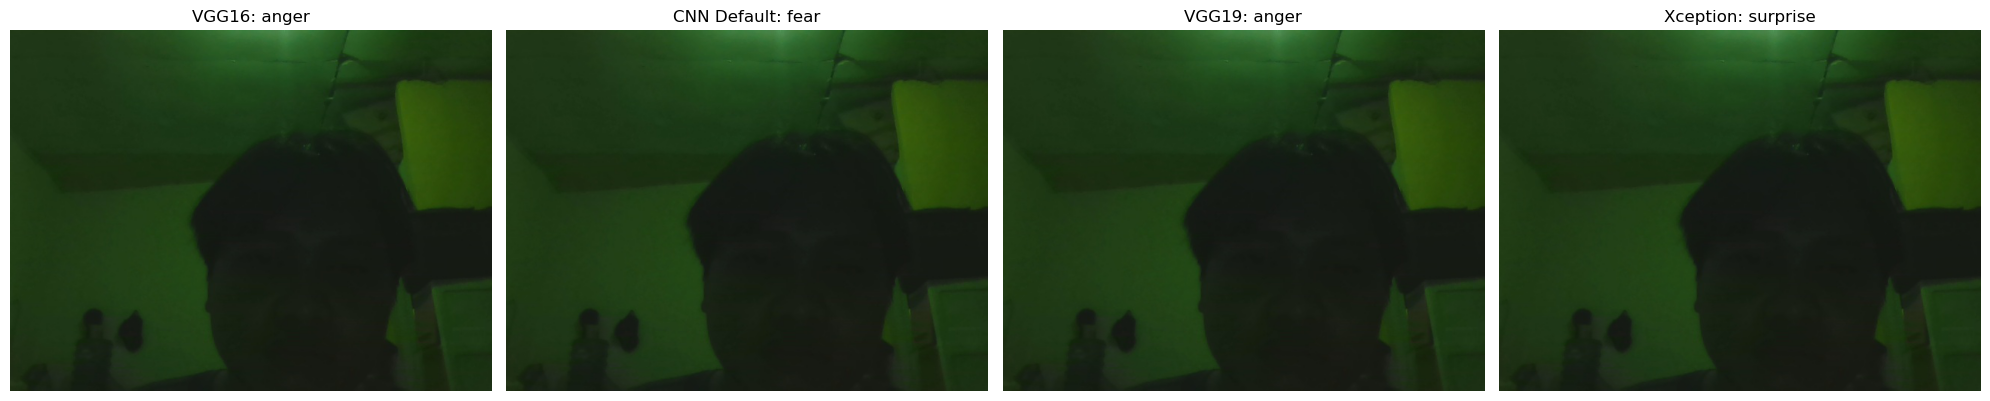

In [6]:
if __name__ == "__main__":
    main()